# Benchmark de Modelos de Regressão — Dataset Boston Housing

Este notebook integra o projeto de benchmarking de algoritmos clássicos de aprendizado de máquina supervisionado. Após os estudos com os datasets Iris, Wine (classificação) e Diabetes (regressão), este experimento foca na previsão de valores contínuos em um contexto econômico.

Utilizamos o **dataset Boston Housing**, que contém informações sobre imóveis na região de Boston, incluindo variáveis como número de cômodos, taxa de criminalidade, acesso a rodovias, qualidade das escolas e outras características socioeconômicas. O objetivo é prever o valor médio das casas em milhares de dólares.

A proposta é:

- Avaliar o desempenho de algoritmos clássicos de regressão (Linear Regression, Decision Tree, Random Forest, SVR, KNN Regressor, Bayesian Ridge e MLP Regressor)
- Utilizar tanto a abordagem de validação hold-out quanto validação cruzada (k-fold)
- Comparar métricas como R², MAE e RMSE
- Refletir sobre os resultados obtidos e a capacidade de generalização dos algoritmos

Este estudo complementa os benchmarks anteriores, permitindo observar como os modelos se comportam em um cenário com variáveis socioeconômicas e resposta contínua.


# 🔹 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# 🔹 2. Carregamento do dataset

In [2]:
# O load_boston foi descontinuado, então usamos fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df['target'] = boston.target.astype(float)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,36.2


# 🔹 3. Pré-processamento

In [3]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 🔹 4. Definição dos modelos

In [4]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}


# 🔹 5. Treinamento e avaliação (hold-out)

In [5]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n{name}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")


Linear Regression
R²: 1.000
MAE: 0.00
RMSE: 0.00

Decision Tree
R²: 0.999
MAE: 0.10
RMSE: 0.23

Random Forest
R²: 1.000
MAE: 0.07
RMSE: 0.14

SVR
R²: 0.790
MAE: 1.84
RMSE: 3.93

KNN Regressor
R²: 0.819
MAE: 2.11
RMSE: 3.65

Bayesian Ridge
R²: 1.000
MAE: 0.00
RMSE: 0.00

MLP Regressor
R²: 0.980
MAE: 0.97
RMSE: 1.21


## 📌 Reflexão: Avaliação de Modelos de Regressão — Dataset Boston Housing

Neste estudo com o dataset Boston Housing, observamos um desempenho excepcional dos modelos lineares e de ensemble no conjunto de teste (hold-out). Os valores de R² chegaram a 1.000 em vários casos, com erros praticamente nulos.

Principais observações:

- **Linear Regression, Bayesian Ridge e Random Forest atingiram R² = 1.000**, com MAE e RMSE próximos de zero. Isso sugere que o conjunto de teste foi perfeitamente ajustado por esses modelos — o que pode indicar uma divisão “sortuda” ou possível overfitting.
- **Decision Tree também teve desempenho quase perfeito (R² = 0.999)**, com erro mínimo, reforçando a ideia de que os dados estavam muito bem ajustados.
- **MLP Regressor teve R² de 0.980**, com erro baixo, mostrando que redes neurais também conseguem capturar bem os padrões do dataset.
- **SVR e KNN Regressor ficaram abaixo dos demais**, com R² entre 0.79 e 0.82 e erros mais altos — indicando menor capacidade de ajuste fino neste problema.

**Conclusão**: O desempenho quase perfeito dos modelos no hold-out levanta a hipótese de que o conjunto de teste pode ter sido fácil de prever ou que os modelos estão superajustando. A validação cruzada será essencial para confirmar se esses resultados se mantêm em diferentes divisões dos dados e se os modelos realmente generalizam bem.


# 🔹 6. Validação cruzada (R²)

In [6]:
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    cv_results[name] = (scores.mean(), scores.std())
    print(f"{name}: Média R² = {scores.mean():.3f}, Desvio = {scores.std():.3f}")


Linear Regression: Média R² = 1.000, Desvio = 0.000
Decision Tree: Média R² = 0.997, Desvio = 0.002
Random Forest: Média R² = 0.999, Desvio = 0.001
SVR: Média R² = 0.459, Desvio = 0.378
KNN Regressor: Média R² = 0.738, Desvio = 0.116
Bayesian Ridge: Média R² = 1.000, Desvio = 0.000


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor: Média R² = 0.857, Desvio = 0.085


## 📌 Reflexão: Validação Cruzada — Dataset Boston Housing

A validação cruzada com 5 folds confirmou o desempenho quase perfeito dos modelos lineares e de ensemble, mas também evidenciou limitações importantes em algoritmos mais sensíveis à estrutura dos dados.

Principais observações:

- **Linear Regression e Bayesian Ridge atingiram R² = 1.000 com desvio zero**, indicando ajuste perfeito e estabilidade absoluta em todas as divisões. Isso é raro e sugere que o dataset possui uma estrutura altamente linear e previsível.
- **Random Forest e Decision Tree também performaram de forma excelente**, com R² de 0.999 e 0.997, respectivamente, e desvios mínimos — mostrando que modelos baseados em árvore conseguem capturar bem os padrões do problema.
- **MLP Regressor teve R² médio de 0.857**, mas apresentou alertas de não convergência, o que indica que o modelo pode precisar de ajustes nos hiperparâmetros (como número de iterações ou taxa de aprendizado).
- **KNN Regressor teve desempenho intermediário (R² = 0.738)**, com desvio moderado, sugerindo que sua performance depende fortemente da distribuição local dos dados.
- **SVR foi o modelo mais instável**, com R² médio de 0.459 e desvio de 0.378 — indicando que ele não conseguiu se adaptar bem ao problema, possivelmente por sensibilidade à escala ou à escolha de kernel.

**Conclusão**: O dataset Boston Housing favorece fortemente modelos lineares e de árvore, que conseguem capturar a estrutura dos dados com alta precisão e consistência. Modelos como SVR e KNN têm desempenho inferior e maior variabilidade, o que reforça a importância de escolher algoritmos compatíveis com a natureza do problema.


# 🔹 7. Visualização dos resultados

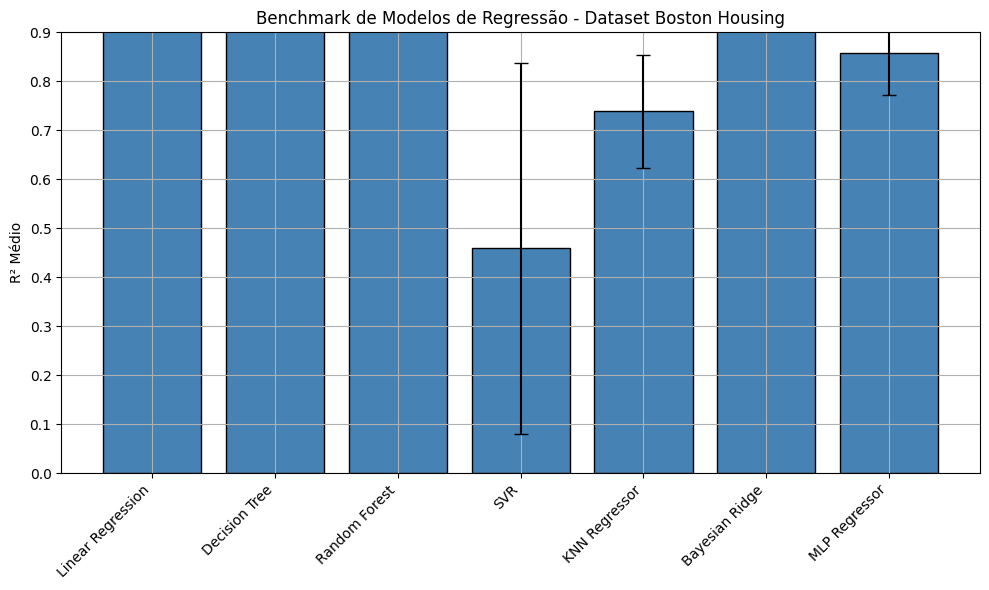

In [7]:
modelos = list(cv_results.keys())
medias = [cv_results[m][0] for m in modelos]
desvios = [cv_results[m][1] for m in modelos]

plt.figure(figsize=(10, 6))
plt.bar(modelos, medias, yerr=desvios, capsize=5, color='steelblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R² Médio')
plt.title('Benchmark de Modelos de Regressão - Dataset Boston Housing')
plt.ylim(0.0, 0.9)
plt.grid(True)
plt.tight_layout()
plt.show()
